# 激活函数

## sigmoid函数

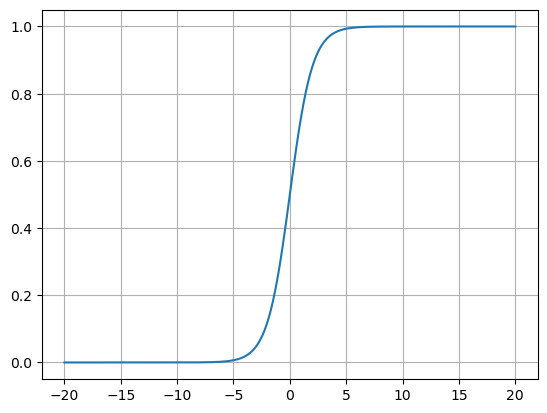

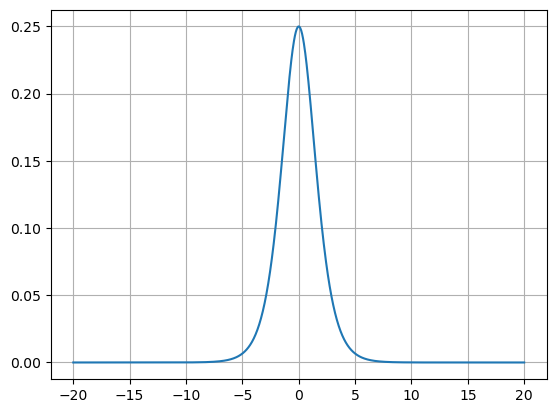

In [1]:
import torch
import matplotlib.pyplot as plt
# 函数

x = torch.linspace(-20, 20, 1000)
y = torch.sigmoid(x)
plt.plot(x, y)
plt.grid()
plt.show()

# 导函数
x = torch.linspace(-20, 20, 1000, requires_grad=True)
torch.sigmoid(x).sum().backward() # 对每个点计算sigmoid函数值，求和之后反向传播计算梯度
plt.plot(x.detach(), x.grad) # detach()用于分离不需要梯度的张量
plt.grid()
plt.show()

## tanh激活函数

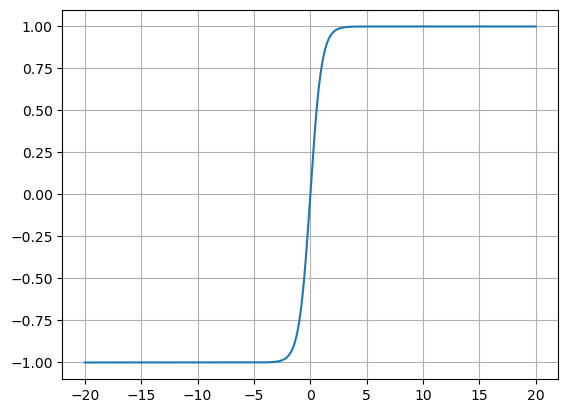

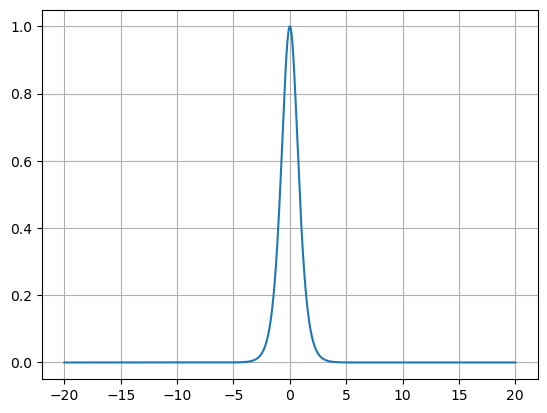

In [3]:
import torch
import matplotlib.pyplot as plt

# 函数
x = torch.linspace(-20, 20, 1000)
y = torch.tanh(x)
plt.plot(x, y)
plt.grid()
plt.show()

# 导函数
x = torch.linspace(-20, 20, 1000, requires_grad=True)
torch.tanh(x).sum().backward()

plt.plot(x.detach(), x.grad)
plt.grid()
plt.show()

## ReLU函数

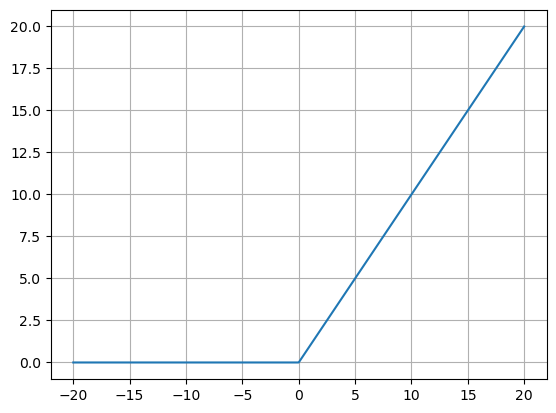

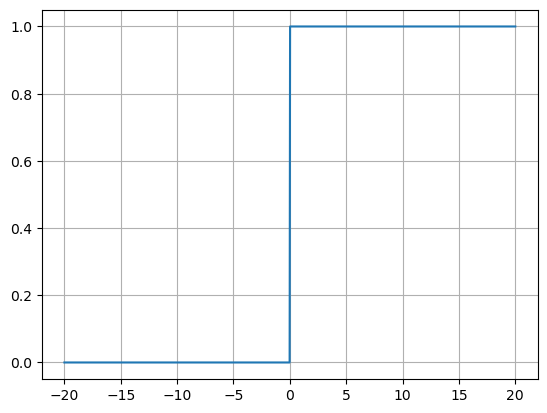

In [4]:
# 函数
x = torch.linspace(-20, 20, 1000)
y = torch.relu(x)
plt.plot(x, y)
plt.grid()
plt.show()

# 导函数
x = torch.linspace(-20, 20, 1000, requires_grad=True)
torch.relu(x).sum().backward()
plt.plot(x.detach(),x.grad)
plt.grid()
plt.show()

## Softmax激活函数

In [5]:
import torch
import matplotlib.pyplot as plt
scores = torch.tensor([0.2, 0.02, 0.15, 0.15, 1.3, 0.5, 0.06, 1.1, 0.05, 3.75])

print(torch.softmax(scores, dim = 0))

tensor([0.0212, 0.0177, 0.0202, 0.0202, 0.0638, 0.0287, 0.0185, 0.0522, 0.0183,
        0.7392])


# 参数初始化

In [1]:
import torch.nn as nn

linear = nn.Linear(in_features=3, out_features=2)
print(linear.weight.data)
print(linear.bias.data)

tensor([[ 0.2133, -0.0237,  0.0463],
        [-0.4905, -0.4572, -0.2037]])
tensor([-0.1752,  0.4742])


In [2]:
# 初始化
nn.init.zeros_(linear.weight)
print(linear.weight.data)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
nn.init.ones_(linear.weight)
nn.init.constant_(linear.weight, 100)
nn.init.normal_(linear.weight, mean = 0, std = 1)
nn.init.uniform_(linear.weight)
nn.init.kaiming_normal_(linear.weight)
nn.init.kaiming_uniform_(linear.weight)
nn.init.xavier_normal_(linear.weight)
nn.init.xavier_uniform(linear.weight)

print(linear.weight.data)

tensor([[ 0.0698, -0.7538,  0.8558],
        [ 0.8462,  0.0884, -0.3978]])


C:\Users\30665\AppData\Local\Temp\ipykernel_29264\2028634771.py:8: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(linear.weight)


# 神经网络搭建

In [6]:
import torch

# 类
class model(nn.Module):
    # init:定义层
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=3, out_features=3)
        nn.init.kaiming_normal_(self.layer1.weight)
        self.layer2 = nn.Linear(in_features=3, out_features=2)
        nn.init.xavier_normal_(self.layer2.weight)
        self.out = nn.Linear(in_features=2, out_features=2)
        nn.init.uniform_(self.out.weight)
    # forward：前向传播
    def forward(self, x):
        x_layer1 = self.layer1(x)
        x_layer1 = torch.sigmoid(x_layer1)
        x_layer2 = self.layer2(x_layer1)
        x_layer2 = torch.relu(x_layer2)
        x_out = self.out(x_layer2)
        x_out = torch.softmax(x_out, dim = -1)
        return x_out

if __name__ == '__main__':
    my_model = model()
    x = torch.randn(10, 3)
    out = my_model(x)
    print(out.shape)

torch.Size([10, 2])


## 模型量计算

In [10]:
import torch
from torchsummary import summary
import torch.nn as nn
# 类
class model(nn.Module):
    # init:定义层
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=3, out_features=3)
        nn.init.kaiming_normal_(self.layer1.weight)
        self.layer2 = nn.Linear(in_features=3, out_features=2)
        nn.init.xavier_normal_(self.layer2.weight)
        self.out = nn.Linear(in_features=2, out_features=2)
        nn.init.uniform_(self.out.weight)
    # forward：前向传播
    def forward(self, x):
        x_layer1 = self.layer1(x)
        x_layer1 = torch.sigmoid(x_layer1)
        x_layer2 = self.layer2(x_layer1)
        x_layer2 = torch.relu(x_layer2)
        x_out = self.out(x_layer2)
        x_out = torch.softmax(x_out, dim = -1)
        return x_out

if __name__ == '__main__':
    my_model = model()
    x = torch.randn(10, 3)
    out = my_model(x)
    print(out.shape)

    summary(my_model, input_size=(3, ), batch_size=8)

    for name, para in my_model.named_parameters():
        print(name)
        print(para)

torch.Size([10, 2])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                     [8, 3]              12
            Linear-2                     [8, 2]               8
            Linear-3                     [8, 2]               6
Total params: 26
Trainable params: 26
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
layer1.weight
Parameter containing:
tensor([[-0.0174,  0.2658,  0.3262],
        [ 0.3657, -1.6860, -0.3094],
        [ 1.6522,  0.9746, -0.1024]], requires_grad=True)
layer1.bias
Parameter containing:
tensor([-0.3402, -0.4502,  0.1562], requires_grad=True)
layer2.weight
Parameter containing:
tensor([[-0.6302,  0.2140, -0.4336],
        [ 0.9756, -0.

# 损失函数

## 多分类损失函数

In [11]:
import torch.nn as nn
import torch

y_true = torch.tensor([0, 1, 2], dtype = torch.int64)
y_pre = torch.tensor([[8, 9, 10], [12, 4, 6], [3, 8, 6]], dtype = torch.float32)
loss = nn.CrossEntropyLoss()
print(loss(y_pre, y_true))

tensor(4.1811)


In [13]:
# 将损失减小
import torch.nn as nn
import torch

y_true = torch.tensor([0, 1, 2], dtype = torch.int64)
y_pre = torch.tensor([[18, 9, 10], [2, 14, 6], [3, 8, 16]], dtype = torch.float32)
loss = nn.CrossEntropyLoss()
print(loss(y_pre, y_true))

tensor(0.0004)


In [15]:
# 使用热编码（one_hot）
import torch.nn as nn
import torch

y_true = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]],dtype = torch.float32)
y_pre = torch.tensor([[18, 9, 10], [2, 14, 6], [3, 8, 16]], dtype = torch.float32)
loss = nn.CrossEntropyLoss()
print(loss(y_pre, y_true))

tensor(0.0004)


## 二分类任务损失函数

In [17]:
import torch.nn as nn
import torch

y_true = torch.tensor([0, 1, 0, 1], dtype = torch.float32)
y_pre = torch.tensor([0.9, 0.1, 0.8, 0.2], dtype = torch.float32)

loss = nn.BCELoss()
print(loss(y_pre, y_true))

tensor(1.9560)


In [18]:
# 降低损失
import torch.nn as nn
import torch

y_true = torch.tensor([0, 1, 0, 1], dtype = torch.float32)
y_pre = torch.tensor([0.1, 0.9, 0.2, 0.8], dtype = torch.float32)
loss = nn.BCELoss()
print(loss(y_pre, y_true))

tensor(0.1643)


In [19]:
# 使用requires_grad = True
# 降低损失
import torch.nn as nn
import torch

y_true = torch.tensor([0, 1, 0, 1], dtype = torch.float32)
y_pre = torch.tensor([0.1, 0.9, 0.2, 0.8], requires_grad= True, dtype = torch.float32)
loss = nn.BCELoss()
my_loss = loss(y_pre, y_true).detach().numpy()

print('loss:',my_loss)

loss: 0.16425204


## 回归任务损失函数-MAE损失函数

In [1]:
import torch.nn as nn
import torch

y_true = torch.tensor([2.0, 3.0, 1.0], dtype = torch.float32)
y_pre = torch.tensor([1.0, 5.0, 4.0], dtype = torch.float32)

loss = nn.L1Loss()
print(loss(y_pre, y_true))

tensor(2.)


## 回归任务损失函数-MSE损失函数

In [2]:
import torch.nn as nn
import torch

y_true = torch.tensor([2.0, 3.0, 1.0], dtype = torch.float32)
y_pre = torch.tensor([1.0, 5.0, 4.0], dtype = torch.float32)

loss = nn.MSELoss()
print(loss(y_pre, y_true))

tensor(4.6667)


## 回归任务损失函数-SmoothL1损失函数

In [3]:
import torch.nn as nn
import torch

y_true = torch.tensor([2.0, 3.0, 1.0], dtype = torch.float32)
y_pre = torch.tensor([1.0, 5.0, 4.0], dtype = torch.float32)

loss = nn.SmoothL1Loss()
print(loss(y_pre, y_true))

tensor(1.5000)


# 3_网络优化方法

## ①指数加权平均

tensor([17,  1,  8, 19, 34,  0, 13,  7, 31,  3, 20, 38, 30,  6, 38, 31, 18, 19,
        35, 10, 23, 25, 13, 12, 38, 31, 24, 27, 23, 19])


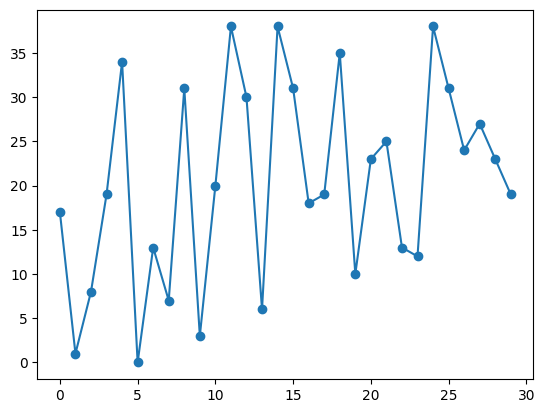

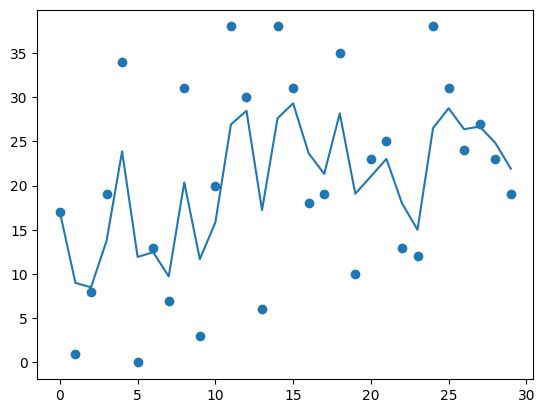

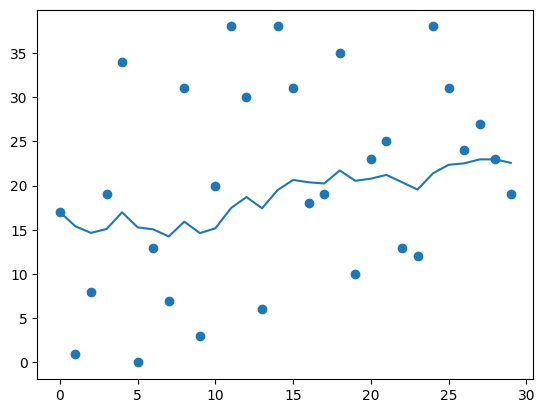

In [8]:
# 用30天的气温预测明天的温度

import torch
import matplotlib.pyplot as plt

t = torch.randint(0, 40, [30])
print(t)

days = torch.arange(0, 30, 1)
plt.plot(days, t)
plt.scatter(days, t)
plt.show()

# 完成指数加权平均
t_avg = []
beta = 0.5
for i, temp in enumerate(t):
    if i == 0:
        t_avg.append(temp)
        continue
    t2 = beta * t_avg[i - 1] + (1 - beta) * temp
    t_avg.append(t2)

plt.plot(days, t_avg)
plt.scatter(days, t)
plt.show()


"""将beta参数增大"""
t_avg = []
beta = 0.9
for i, temp in enumerate(t):
    if i == 0:
        t_avg.append(temp)
        continue
    t2 = beta * t_avg[i - 1] + (1 - beta) * temp
    t_avg.append(t2)

plt.plot(days, t_avg)
plt.scatter(days, t)
plt.show()

## ②动量算法Momentum

In [11]:
import torch

w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
loss = ((w ** 2)*0.5).sum()

optimizer = torch.optim.SGD([w], lr = 0.01)

optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第一次更新  梯度：",w.grad) # 获取梯度的值
print("第一次更新  w：",w.detach()) # 获取w的值

# 再次更新参数
loss = ((w ** 2)*0.5).sum()
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第二次更新  梯度：",w.grad) # 获取梯度的值
print("第二次更新  w：",w.detach()) # 获取w的值


第一次更新  梯度： tensor([1.])
第一次更新  w： tensor([0.9900])
第二次更新  梯度： tensor([0.9900])
第二次更新  w： tensor([0.9801])


In [12]:
"""加了动量之后的结果"""

import torch

w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

loss = ((w ** 2)*0.5).sum()

optimizer = torch.optim.SGD([w], lr = 0.01, momentum=0.9)

optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第一次更新（加了动量之后）梯度：",w.grad)
print("第一次更新（加了动量之后）w：",w.detach())

loss = ((w ** 2)*0.5).sum()
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第二次更新（加了动量之后）梯度：",w.grad)
print("第二次更新（加了动量之后）w：",w.detach()) # tensor([0.9711])改变了，没加动量时 tensor([0.9801])

"""tensor([0.9900])--->tensor([0.9711])   减少得更多，更新得更加快一点"""

第一次更新（加了动量之后）梯度： tensor([1.])
第一次更新（加了动量之后）w： tensor([0.9900])
第二次更新（加了动量之后）梯度： tensor([0.9900])
第二次更新（加了动量之后）w： tensor([0.9711])


## ③AdaGrad

In [13]:
import torch

w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
loss = ((w ** 2)*0.5).sum()

optimizer = torch.optim.Adagrad([w], lr = 0.01)

optimizer.zero_grad()
loss.backward()

print("第一次更新  梯度：",w.grad) # 获取梯度的值
print("第一次更新  w：",w.detach()) # 获取w的值

# 再次更新参数
loss = ((w ** 2)*0.5).sum()
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第二次更新  梯度：",w.grad) # 获取梯度的值
print("第二次更新  w：",w.detach()) # 获取w的值

第一次更新  梯度： tensor([1.])
第一次更新  w： tensor([1.])
第二次更新  梯度： tensor([1.])
第二次更新  w： tensor([0.9900])


## ④RMSProp

In [14]:
import torch

w = torch.tensor([0.1], requires_grad=True, dtype = torch.float32)
loss = ((w ** 2)*0.5).sum()

optimizer = torch.optim.RMSprop([w], lr = 0.01, alpha = 0.9)

optimizer.zero_grad()
loss.backward()

print("第一次更新 梯度：", w.grad)
print("第一次更新 w：", w.detach())

# 再次更新参数
loss = ((w ** 2)*0.5).sum()
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("第二次更新  梯度：",w.grad) # 获取梯度的值
print("第二次更新  w：",w.detach()) # 获取w的值

第一次更新 梯度： tensor([0.1000])
第一次更新 w： tensor([0.1000])
第二次更新  梯度： tensor([0.1000])
第二次更新  w： tensor([0.0684])


# 4-学习率衰减方法

## ①等间隔学习率衰减

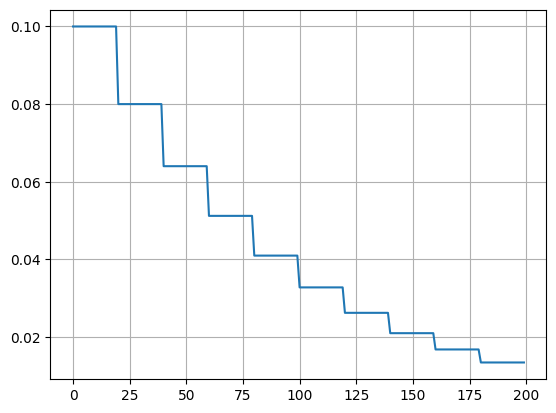

In [16]:
import torch
import matplotlib.pyplot as plot

# 参数初始化
LR = 0.1
iteration = 100
epochs = 200
# 网络数据初始化
x = torch.tensor([1.0])
w = torch.tensor([1.0], requires_grad = True)
y = torch.tensor([1.0])
# 优化器
optimizer = torch.optim.SGD([w], lr = LR, momentum=0.9)
# 学习率策略
scheduler_lr = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma = 0.8)
# 遍历轮次
epoch_list = []
lr_list = []
for epoch in range(epochs):
    lr_list.append(scheduler_lr.get_last_lr())
    epoch_list.append(epoch)

    # 遍历batch
    for i in range(iteration):
        # 计算损失
        loss = ((w*x-y)**2)*0.5
        # 更新参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 更新lr
    scheduler_lr.step()
# 绘制结果
plt.plot(epoch_list, lr_list)
plt.grid()
plt.show()

## ②指定间隔学习率衰减

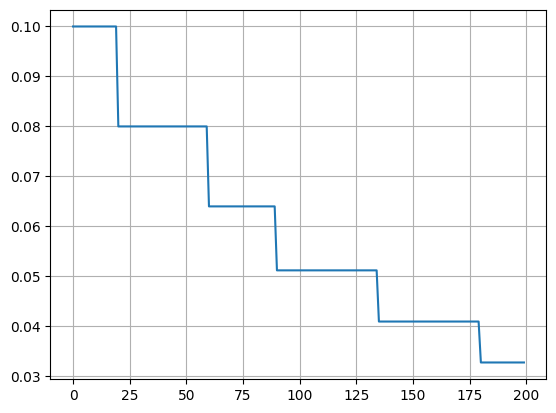

In [17]:
import torch
import matplotlib.pyplot as plot

# 参数初始化
LR = 0.1
iteration = 100
epochs = 200
# 网络数据初始化
x = torch.tensor([1.0])
w = torch.tensor([1.0], requires_grad = True)
y = torch.tensor([1.0])
# 优化器
optimizer = torch.optim.SGD([w], lr = LR, momentum=0.9)
# 学习率策略
scheduler_lr = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = [20, 60, 90, 135, 180], gamma = 0.8)
# 遍历轮次
epoch_list = []
lr_list = []
for epoch in range(epochs):
    lr_list.append(scheduler_lr.get_last_lr())
    epoch_list.append(epoch)

    # 遍历batch
    for i in range(iteration):
        # 计算损失
        loss = ((w*x-y)**2)*0.5
        # 更新参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 更新lr
    scheduler_lr.step()
# 绘制结果
plt.plot(epoch_list, lr_list)
plt.grid()
plt.show()

## ③按指数学习率衰减

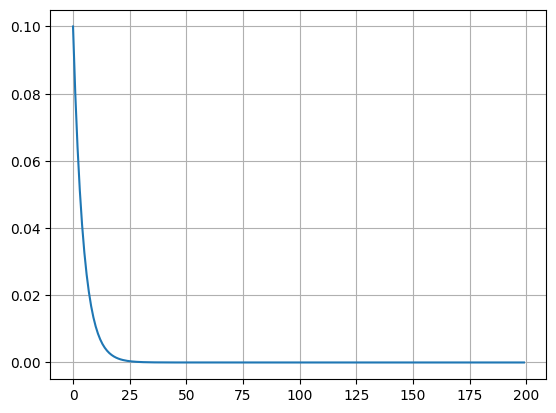

In [18]:
import torch
import matplotlib.pyplot as plot

# 参数初始化
LR = 0.1
iteration = 100
epochs = 200
# 网络数据初始化
x = torch.tensor([1.0])
w = torch.tensor([1.0], requires_grad = True)
y = torch.tensor([1.0])
# 优化器
optimizer = torch.optim.SGD([w], lr = LR, momentum=0.9)
# 学习率策略
scheduler_lr = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.8)
# 遍历轮次
epoch_list = []
lr_list = []
for epoch in range(epochs):
    lr_list.append(scheduler_lr.get_last_lr())
    epoch_list.append(epoch)

    # 遍历batch
    for i in range(iteration):
        # 计算损失
        loss = ((w*x-y)**2)*0.5
        # 更新参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 更新lr
    scheduler_lr.step()
# 绘制结果
plt.plot(epoch_list, lr_list)
plt.grid()
plt.show()

# 正则化方法

## ①DropOut正则化（随机失活）

In [20]:
import torch
import torch.nn as nn

torch.random.manual_seed(22)
input = torch.randn([1, 4])
layer = nn.Linear(in_features=4, out_features=5)
y = layer(input)
print(y)

dropout = nn.Dropout(p = 0.75)
out = dropout(y)
print(out)

tensor([[ 0.3381,  0.1653, -0.3763, -0.2341, -0.2123]],
       grad_fn=<AddmmBackward0>)
tensor([[ 0.0000,  0.0000, -1.5052, -0.0000, -0.8494]], grad_fn=<MulBackward0>)
